In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from io import BytesIO
import pandas_datareader.data as dat_aq
from datetime import datetime, timedelta

import rec_mod as rm
#recession data for comparison
usrec = rm.rec_periods('USREC')

D:\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


D:\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


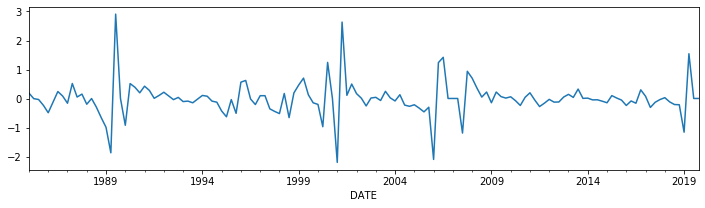

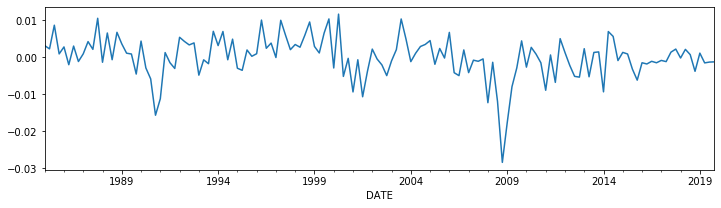

D:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                         Markov Switching Model Results                         
================================================================================
Dep. Variable:                  log_ret   No. Observations:                  136
Model:             MarkovAutoregression   Log Likelihood                 531.910
Date:                  Thu, 30 Apr 2020   AIC                          -1041.819
Time:                          17:06:59   BIC                          -1009.780
Sample:                      01-01-1985   HQIC                         -1028.799
                           - 10-01-2019                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0051      0.002     -3.294      0.001      -0.008      -0.002
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0012      0.001      1.639      0.101      -0.000       0.003
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.227e-05    2.8e-06      7.957      0.000    1.68e-05    2.78e-05
ar.L1          0.1908      0.090      2.118      0.034       0.014       0.367
ar.L2          0.1981      0.092      2.152      0.031       0.018       0.379
ar.L3         -0.0381      0.094     -0.406      0.685      -0.222       0.146
ar.L4          0.0043      0.093      0.046      0.963      -0.178       0.187
                           Regime transition parameters                          
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
p[0->0].tvtp0     1.8694      0.783      2.387      0.017       0.334       3.404
p[1->0].tvtp0  -156.2392   5.41e-10  -2.89e+11      0.000    -156.239    -156.239
p[0->0].tvtp1    -0.0502      1.015     -0.049      0.961      -2.039       1.938
p[1->0].tvtp1   189.3533   6.34e-11   2.99e+12      0.000     189.353     189.353
=================================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
[2] Covariance matrix is singular or near-singular, with condition number 1.74e+19. Standard errors may be unstable.
"""

In [2]:
exog = rm.pull_data('T10Y3M', 'fred', datetime(1984,10,1), datetime(2019,10,1))
endog = rm.pull_data('GDPC1', 'fred', datetime(1984,10,1), datetime(2019,10,1))
result, model = rm.SOP_Phase_1(endog = endog, model_type='Markov_Filardo', regimes = 2, model_order = 4, endog_ret_type='log_mean_ret', exog = exog, exog_ret_type = 'log_mean_ret')
#result = SOP_Phase_1('GDP', 'fred', datetime(1980,1,1), datetime(2010, 10, 1), 'QS', 'pct_chg', 'Markov_Hamilton', 2, 4)
result.summary()

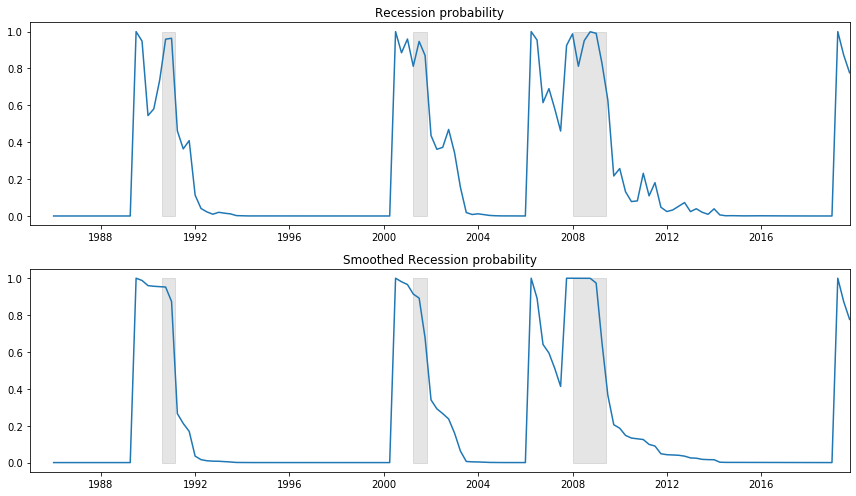

0.3200970451609076
precision =  3.1240525806707033
0.3222025548732862
smooth_precision =  3.103637711356056


In [3]:
rm.rec_prob_graph(result, usrec, datetime(1985,1,1), datetime(2019,10,1))

In [4]:
result.expected_durations.dropna()[0].mean()

7.0233571092210205